In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

# Winner.Year X WPts

In [7]:
wyw = pd.read_excel('results/winneryearwpts.xlsx')

In [10]:
wyw

,Dimmatch.Match,Dimdate.Tempo,WPts
0,Ahouda A.,2017-04-11,13.00
1,Albot R.,2015-09-29,498.00
2,Albot R.,2016-04-19,361.00
3,Albot R.,2016-06-29,544.00
4,Albot R.,2016-10-17,596.00
5,Albot R.,2017-02-06,615.00
6,Albot R.,2017-04-10,655.00
7,Albot R.,2017-06-26,478.00
8,Albot R.,2017-06-28,478.00
9,Albot R.,2017-07-04,513.00


# Main pd

In [45]:
df = pd.read_excel("ATP Men's Tour.xlsx")

In [48]:
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,2017-12-31,ATP250,Outdoor,Hard,1st Round,3,Dolgopolov O.,...,2.10,1.65,2.20,1.67,2.24,1.71,2.29,1.77,2.17,1.68
1,1,Brisbane,Brisbane International,2017-12-31,ATP250,Outdoor,Hard,1st Round,3,De Minaur A.,...,2.80,1.38,2.75,1.44,3.14,1.41,3.25,1.44,2.96,1.39
2,1,Brisbane,Brisbane International,2018-01-01,ATP250,Outdoor,Hard,1st Round,3,Harrison R.,...,1.62,2.15,1.67,2.20,1.66,2.35,1.75,2.35,1.67,2.17
3,1,Brisbane,Brisbane International,2018-01-01,ATP250,Outdoor,Hard,1st Round,3,Ebden M.,...,2.35,1.53,2.37,1.57,2.38,1.64,2.52,1.65,2.37,1.58
4,1,Brisbane,Brisbane International,2018-01-01,ATP250,Outdoor,Hard,1st Round,3,Zverev M.,...,1.47,2.50,1.57,2.37,1.44,3.00,1.57,3.00,1.44,2.73


# WRank history

In [247]:
wwrank = df[["Date", "Winner", "WRank"]].copy()

In [248]:
wwrank15 = wwrank[wwrank['Date'].dt.year == 2015]
wwrank16 = wwrank[wwrank['Date'].dt.year == 2016]
wwrank17 = wwrank[wwrank['Date'].dt.year == 2017]
wwrank18 = wwrank[wwrank['Date'].dt.year == 2018]

In [250]:
grouped = wwrank.groupby([(wwrank.Date.dt.year),'Winner'])

In [298]:
results = {}
for name,group in grouped:
    if (group.Winner.values[0] == "Djokovic N."):
        year, name = name
        print(year, name)
        print(group.WRank.values)

2015 Djokovic N.
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
2016 Djokovic N.
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.]
2017 Djokovic N.
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4.
 4. 4. 4. 4. 4. 4. 4.]
2018 Djokovic N.
[14. 14. 14. 13. 13. 12. 18. 18. 18. 18. 22. 22. 22. 22. 22. 22. 22. 22.
 21. 21. 21. 21. 21. 21. 21. 10. 10. 10. 10. 10. 10. 10. 10.  6.  6.  6.
  6.  6.  6.  6.  3.  3.  3.  3.  3.  2.  2.  2.  2.  1.  1.  1.  1.]


In [297]:
a = {}
a["1"][0] = "2"

KeyError: '1'

# Surface.Year X WPts

In [106]:
surface = df[["Surface", "Winner", "WPts"]].copy()

In [107]:
surface.head()

,Surface,Winner,WPts
0,Hard,Dolgopolov O.,315.0
1,Hard,De Minaur A.,245.0
2,Hard,Harrison R.,1010.0
3,Hard,Ebden M.,670.0
4,Hard,Zverev M.,1302.0


In [149]:
grouped = surface.groupby(['Surface', 'Winner'])
soma = grouped.agg({'WPts':sum})
final = soma['WPts'].groupby(level=0, group_keys=False)

In [152]:
top = final.nlargest(10)

In [192]:
top

Surface  Winner      
Clay     Djokovic N.      590665.0
         Nadal R.         558670.0
         Murray A.        350340.0
         Thiem D.         254425.0
         Wawrinka S.      193285.0
         Nishikori K.     193200.0
         Zverev A.        156400.0
         Ferrer D.        144425.0
         Federer R.       136870.0
         Cilic M.         124305.0
Grass    Federer R.       335405.0
         Murray A.        217350.0
         Djokovic N.      196920.0
         Cilic M.         122315.0
         Nadal R.          80560.0
         Raonic M.         77415.0
         Berdych T.        62275.0
         Nishikori K.      58220.0
         Zverev A.         48850.0
         Thiem D.          46785.0
Hard     Djokovic N.     1802325.0
         Federer R.       908040.0
         Murray A.        807365.0
         Nadal R.         599165.0
         Wawrinka S.      476730.0
         Nishikori K.     451240.0
         Berdych T.       363280.0
         Cilic M.         321865.

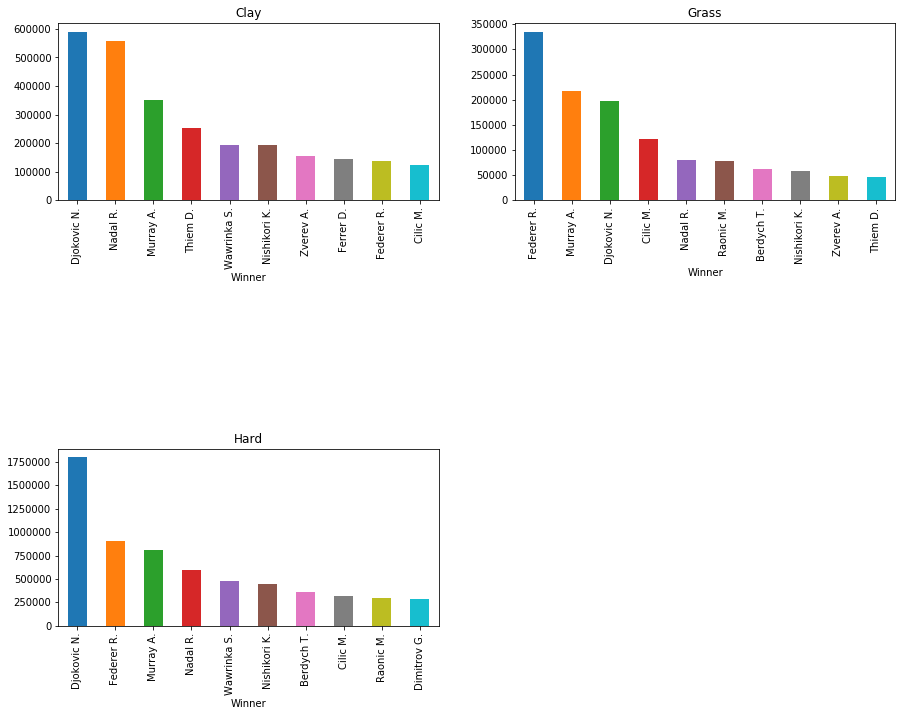

In [246]:
fig = plt.figure(figsize=(15,15))
clay = fig.add_subplot(4,2,1)
clay.title.set_text("Clay")
top.Clay.plot.bar()

grass = fig.add_subplot(4,2,2)
grass.title.set_text("Grass")
top.Grass.plot.bar()

hard = fig.add_subplot(4,2,5)
hard.title.set_text("Hard")
top.Hard.plot.bar()

# Loser X LPts

# Loser X LRank

# Winner X WPts

In [41]:
wwpts = pd.read_excel('results/winnerwpts.xlsx')

In [42]:
wwpts = wwpts.rename(columns={"Dimmatch.Match": "Winner", "WPts": "Pts"})
wwpts.head()

,Winner,Pts
0,Ahouda A.,13.00
1,Albot R.,"13,332.00"
2,Almagro N.,"34,817.00"
3,Altmaier D.,416.00
4,Anderson K.,"324,920.00"


In [43]:
#Remove comma
wwpts['Pts'] = wwpts['Pts'].str.replace(',', '')
wwpts['Pts'] = wwpts['Pts'].astype(float)

In [30]:
#Transform pts colunm to float
wwpts['Pts'] = wwpts['Pts'].astype(float)

In [32]:
grouped = wwpts.groupby('Winner')

In [35]:
final = grouped.sum()

In [44]:
final.sort_values(by=['Pts'], ascending=False)